# DSCI 503 - Project 04
### Dustin Berry

In [1]:
import numpy as np
import pandas as pd              
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Part 1: Loading the Dataset; Preliminary Analysis
This section will be used to load the datset and explore its structure.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


Here we will determine the size of the dataset.  We see that there are 15,120 rows and 13 columns.

In [3]:
fc.shape

(15120, 13)

This will show the distribution of cover types found in the dataset.

In [4]:
fc.Cover_Type.value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

The following syntax will create a list of seven colors to correspond with the cover types for future visualizations.

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 
            'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
This section will explore the relationship between cover types and wilderness areas.  We will start by determining the distribution of wilderness areas within the dataset.

In [6]:
fc.Wilderness_Area.value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

Here we will create a dataframe to determine how many regions of each cover type are in each of the four wilderness areas.

In [7]:
ct_by_wa = pd.crosstab(index=fc['Cover_Type'], columns=fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


The next section will visually represent the information in the ct_by_wa dataframe.

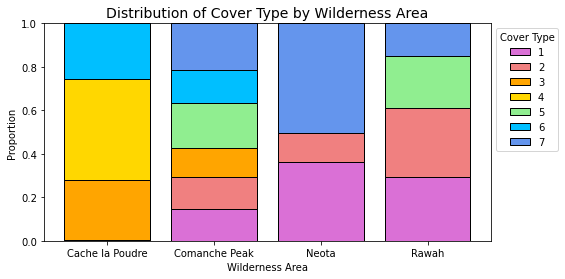

In [8]:
ct_by_wa_props = np.divide(ct_by_wa, np.sum(ct_by_wa, axis = 0))
x = sorted(np.unique(fc.Wilderness_Area))
bb = [0]*(len(x))
idx = 0
plt.figure(figsize=[8,4])

for i, row in ct_by_wa_props.iterrows():
    plt.bar(x, row, color=palette[idx], bottom=bb, 
            label=i,edgecolor='black')
    bb += row
    idx += 1
    
plt.title('Distribution of Cover Type by Wilderness Area', fontsize=14)  
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1), title='Cover Type')
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
This section shows how to create a dataframe to determine the number of regions of each cover type there are for each of the 40 soil types.

In [9]:
ct_by_st = pd.crosstab(index=fc['Cover_Type'], columns=fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


The next section will visually represent the information in the ct_by_st dataframe.

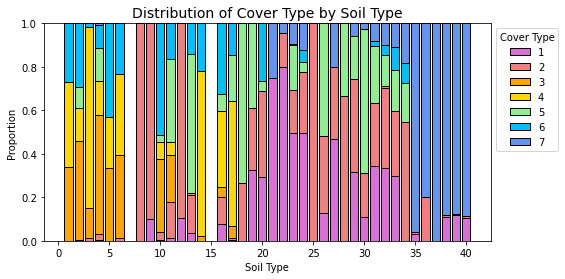

In [10]:
ct_by_st_props = np.divide(ct_by_st, np.sum(ct_by_st, axis = 0))
x2 = sorted(np.unique(fc.Soil_Type))
bb = [0]*(len(x2))
idx = 0
plt.figure(figsize=[8,4])

for i, row in ct_by_st_props.iterrows():
    plt.bar(x2, row, color=palette[idx], bottom=bb, 
            label=i,edgecolor='black')
    bb += row
    idx += 1
    
plt.title('Distribution of Cover Type by Soil Type', fontsize=14)  
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1), title='Cover Type')
plt.show()

## Part 4: Distribution of Elevation by Cover Type
We will start by calculating the average elevation for each of the seven cover types.

In [11]:
fc.loc[:,['Elevation', 'Cover_Type']].groupby('Cover_Type').mean()

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


Here we will create histograms to visually explore the distributions of elevation for each of the seven cover types.

IndexError: list index out of range

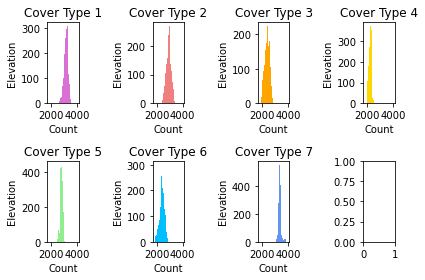

In [12]:
#keeping for reference, another way to do this one


idx = 0

Cover = sorted(pd.unique(fc.Cover_Type))

plt.Figure(figsize=[12,6])
for i in range(0,len(fc.Elevation)):
    plt.subplot(2,4,idx+1)
    mask = fc[fc.Cover_Type == Cover[idx]]
    plt.hist(mask.Elevation,  bins=np.arange(1800, 4050, 50) , color = palette[idx])
    plt.xlims=  [1800,4000]
    plt.ylims =  [0,600]
    plt.xlabel("Count")
    plt.ylabel('Elevation')
    plt.title('Cover Type ' + str(Cover[idx]) )
    idx += 1
    plt.tight_layout()
plt.show()

In [ ]:
x3 = sorted(np.unique(fc.Cover_Type))

plt.figure(figsize=[12,6])
for i in range(0, len(x3)):
    
    plt.subplot(2,4,i+1)
    
    current_cover = x3[i]
    temp_elevation = [fc.Elevation[i] for i in range(len(fc.Elevation)) 
                      if fc.Cover_Type[i] == current_cover]
    
    plt.hist(temp_elevation, bins=np.arange(1800, 4050, 50), 
                color=palette[i], edgecolor='k')

    plt.xlim([1800, 4000])
    plt.ylim([0, 600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    plt.title('Cover Type '+str(x3[i]))

plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
We will start by separating the categorical fewtures, the numerical features, and the labels.

In [ ]:
X_num = fc.iloc[:,0:10].values
X_cat = fc.iloc[:,10:12].values
y = fc.iloc[:,-1].values


print('Numerical Feature Array Shape:  ', X_num.shape)
print('Categorical Feature Array Shape:', X_cat.shape)
print('Label Array Shape:              ', y.shape)

Here we will encode the categorical variables using one-hot encoding.

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print('Encoded feature Array Shape:', X_enc.shape)

Now we will combine the numerical features with the encoded features.

In [ ]:
X = np.hstack((X_num, X_enc))
print('Feature Array Shape:', X.shape)

The following section will split the data into training, validation, and test sets using a 70/15/15 split.

In [ ]:
X_train, X_hold, y_train, y_hold =\
    train_test_split(X, y, test_size=0.3, random_state=1, 
                     stratify=y)
X_valid, X_test, y_valid, y_test =\
    train_test_split(X_hold, y_hold, test_size=0.5, 
                     random_state=1, stratify=y_hold)

print('Training Features Shape:  ', X_train.shape)
print('Validation Features Shape:', X_valid.shape)
print('Test Features Shape:      ', X_test.shape)

## Part 6: Logistic Regression Model
This section will show the results of a logistic regression model to test for predictions.

In [ ]:
lr_mod = LogisticRegression(solver='lbfgs', multi_class='multinomial', 
                            penalty='none', max_iter=1000)
lr_mod.fit(X_train, y_train)

train_acc = lr_mod.score(X_train, y_train)
valid_acc = lr_mod.score(X_valid, y_valid)

print('Training Accuracy:  ', round(train_acc,4))
print('Validation Accuracy:', round(valid_acc,4))

## Part 7: Decision Tree Models
This section will show the results of a decision tree model to test for predictions.

In [ ]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2,31)

for d in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=d)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
    
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

tree = DecisionTreeClassifier(max_depth=dt_opt_depth, random_state=1)
tree.fit(X_train, y_train)

print('Optimal value of max_depth:           ', dt_opt_depth)
print('Training Accuracy for Optimal Model:  ', round(tree.score(X_train, y_train),4))
print('Validation Accuracy for Optimal Model:', round(tree.score(X_valid, y_valid),4))

The following plot will show the training and validation curves as a function of max_depth.

In [ ]:
plt.figure(figsize=([9, 6]))
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.axvline(x=dt_opt_depth, ls='--', color='red') #added vertical line to show optimal tuning
plt.legend()
plt.show()

## Part 8: Random Forest Models
This section will show the results of a random forest model to test for predictions.

In [ ]:
rf_train_acc = []
rf_valid_acc = []

for d in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=d)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

forest = RandomForestClassifier(max_depth=rf_opt_depth, random_state=1)
forest.fit(X_train, y_train)

print('Optimal value of max_depth:           ', rf_opt_depth)
print('Training Accuracy for Optimal Model:  ', round(forest.score(X_train, y_train),4))
print('Validation Accuracy for Optimal Model:', round(forest.score(X_valid, y_valid),4))

The following plot will show the training and validation curves as a function of max_depth.

In [ ]:
plt.figure(figsize=([9, 6]))
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.axvline(x=rf_opt_depth, ls='--', color='red') #added vertical line to show optimal tuning
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model
The final model will be the random forest model due to it's high percentage of accuracy in the validation data set.  In part 8 we calculated that the optimal depth of the model will be 29 in order to maximize the accuracy of the model based on untrained data.  Given the randomness of this model we can allow the max_depth parameter to be set high without having to worry too much about overfitting.

In [ ]:
np.random.seed(1)
final_model = RandomForestClassifier(max_depth=rf_opt_depth)
final_model.fit(X_test, y_test)

print('Training Accuracy for Final Model:  ', round(final_model.score(X_train, y_train),4))
print('Validation Accuracy for Final Model:', round(final_model.score(X_valid, y_valid),4))
print('Testing Accuracy for Final Model:   ', round(final_model.score(X_test, y_test),4))

The following cell will create and display a confusion matrix detailing the models performance on the test set.

In [ ]:
test_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

cm_df = pd.DataFrame(cm).\
    rename(columns={0:'1', 1:'2', 2:'3', 3:'4', 4:'5', 5:'6', 6:'7', 7:'8'}, 
           index={0:'1', 1:'2', 2:'3', 3:'4', 4:'5', 5:'6', 6:'7', 7:'8'})
cm_df

We will now generate a classification report to provide further insight into the model's performance on the test set.

In [ ]:
print(classification_report(y_test, test_pred))